Example 2
=========

This notebook is available on GitHub
[here](https://github.com/aezarebski/aas-extended-examples). If you find errors
or would like to suggest an improvement, feel free to create an issue.

As usual we will start by importing some useful libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

The data in `data-auto.csv` is a popular dataset of car characteristics. We will
be looking at the horsepower and miles per gallon (MPG) obtained by these cars.
The model we will consider in this notebook is a simple linear regression:

$$
\text{mpg}_{i} = \alpha + \beta \text{horsepower}_{i} + \epsilon_{i}
$$

where the $\epsilon_{i}$ are independent and identically distributed (IID)
normal random variables. We will estimate the parameters $\alpha$ and $\beta$.

As in previous notebooks, to accommodate the use of Google Colab we will load
the data in a slightly circuitous way.

In [2]:
auto_url = "https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-2/data-auto.csv"
auto_file = "data-auto.csv"

try:
    df = pd.read_csv(auto_file)
    print("Auto data loaded from file\n")
except:
    print("Could not load auto from file, defaulting to URL")
    df = pd.read_csv(auto_url)
    print("Auto loaded from URL\n")

y = df["mpg"].to_numpy()
x = df["horsepower"].to_numpy()
y_bar = y.mean()
x_bar = x.mean()

Auto data loaded from file



### Question

Plot the horsepower and MPG, describe the relationship between these variables.

### Answer

As the horsepower increases the car gets fewer MPG.

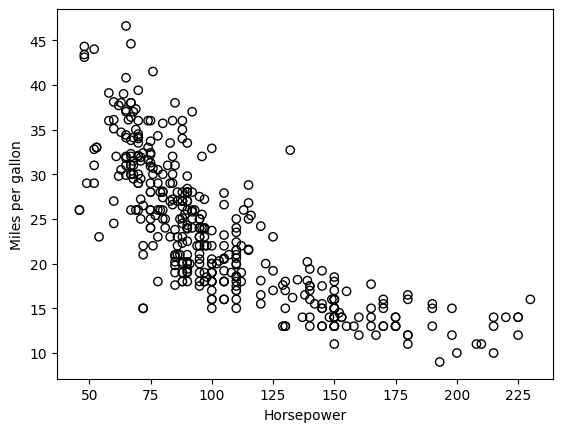

In [3]:
plt.figure()
plt.scatter(x, y, marker='o', facecolor='none', edgecolor='k')
plt.xlabel("Horsepower")
plt.ylabel("Miles per gallon")
plt.show()

### Question

Using the formula you saw in lectures, calculate the least squares estimates
$\hat{\beta}$ and $\hat{\alpha}$

### Answer

In [4]:
beta_hat = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) * (x - x_bar))
alpha_hat = y_bar - beta_hat * x_bar

### Question

Using your parameter estimates, calculate the expected values for the MPG,
$\hat{y}_{i}$, and the residuals, $e_{i}$.

### Answer

In [5]:
y_hat = alpha_hat + beta_hat * x
residuals = y - y_hat

### Question

Plot the model fit and the residuals. Are the assumptions (linearity, constant
variance and independence) of the model valid? What does the model predict would
be the MPG for a car with the power of 400 horses?

### Answer

The MPG does not vary linearly with the horsepower, we will learn how to address
this later in the course. Extending the regression to a horsepower of 400
produces a negative estimate of MPG which clearly does not make sense.

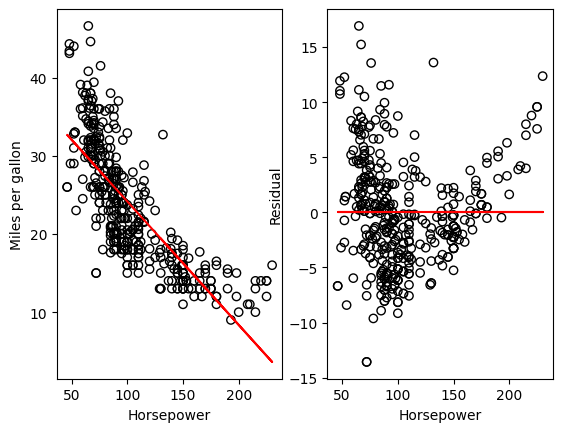

In [6]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(x, y, marker='o', facecolor='none', edgecolor='k')
axs[0].plot(x, y_hat, color='r')
axs[0].set_xlabel("Horsepower")
axs[0].set_ylabel("Miles per gallon")
axs[1].scatter(x, residuals, marker='o', facecolor='none', edgecolor='k')
axs[1].plot(x, np.repeat(0, x.size), color='r')
axs[1].set_xlabel("Horsepower")
axs[1].set_ylabel("Residual")
plt.show()

### Question

Calculate the correlation coeffient, and $R^{2}$.

### Answer

In [7]:
corr_coef = np.sum((x - x_bar) * (y - y_bar)) / (np.sqrt(np.sum((x - x_bar) * (x - x_bar))) * np.sqrt(np.sum((y - y_bar) * (y - y_bar))))

total_sum_sqrs = np.sum((y - y_bar)**2)
reg_sum_sqrs = np.sum((y_hat - y_bar)**2)
res_sum_sqrs = np.sum((y - y_hat)**2)

r_sqrd = 1 - res_sum_sqrs / total_sum_sqrs

print(r_sqrd)
print(corr_coef**2)

0.6059482578894348
0.6059482578894345


### Question

Calculate the confidence intervals on your estimates. Is the result significant?

### Answer

We use the _t_-distribution with $n-2$ degrees of freedom to compute the
confidence intervals because we needed to estimate the residual standard error
and two degrees of freedom where used to estimate the coefficients of the linear
model.

Yes, the coefficients are both significantly different from zero.

In [8]:
n = df.shape[0]
sigma_hat = np.sqrt(res_sum_sqrs / (n - 2))

s_x = np.sum(x**2)
s_xx = np.sum((x - x_bar)**2)

var_beta_hat = sigma_hat**2 / s_xx

var_alpha_hat = sigma_hat**2 * s_x / (n * s_xx)

t_val = stats.t.ppf(0.975, df = n-2)

alpha_ci = (
    alpha_hat - t_val * np.sqrt(var_alpha_hat),
    alpha_hat + t_val * np.sqrt(var_alpha_hat)
)

beta_ci = (
    beta_hat - t_val * np.sqrt(var_beta_hat),
    beta_hat + t_val * np.sqrt(var_beta_hat)
)

print(alpha_ci)
print(beta_ci)

(38.525211789229616, 41.34651025311132)
(-0.17051700846435697, -0.14517245824295028)


### `statsmodels`

We are finally ready to use the `statsmodel` package. In the following code we
perform ordinary least squares regression and print out a summary. You can see
that all of the estimates agree with those we calculated above.

In [9]:
my_lm = smf.ols("mpg ~ horsepower", df).fit()
print(my_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           7.03e-81
Time:                        16:12:24   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0